In [2]:
import gym
import numpy as np
from tqdm import tqdm

env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

In [14]:
s, info = env.reset()

samatrix = np.zeros([16, 4])
gamma = 0.90
alpha = 0.000025
epsilon = 1

nep = 10000000
n = nep
sumr = 0
rrec = []

with tqdm(total = n) as pbar:
    while nep > 0:
        
        if np.random.rand() < epsilon:
            options = np.where(samatrix[s] != max(samatrix[s]))[0]
            if len(options) > 0:
                act = np.random.randint(0, len(options))
                act = options[act]
                s1, r, terminated, truncated, info = env.step(act)
            else:
                act = np.random.randint(0, 4)
                s1, r, terminated, truncated, info = env.step(act)
        else:
            optoption = np.where(samatrix[s] == max(samatrix[s]))[0]
            if len(optoption) > 0:
                act = optoption[0]
                s1, r, terminated, truncated, info = env.step(act)
            else:
                act = np.random.randint(0, 4)
                s1, r, terminated, truncated, info = env.step(act)


        maxqs1 = max(samatrix[s1])
        qs = samatrix[s][act]
        samatrix[s][act] = qs + alpha*(r + gamma*maxqs1 - qs)
        sumr +=  r

        if terminated or truncated:
            s, info = env.reset()
            nep -= 1
            epsilon -= 1/n
            rrec.append(sumr)
            sumr = 0
            pbar.update(1)

        else:
            s = s1

100%|██████████| 10000000/10000000 [2:15:55<00:00, 1226.10it/s] 


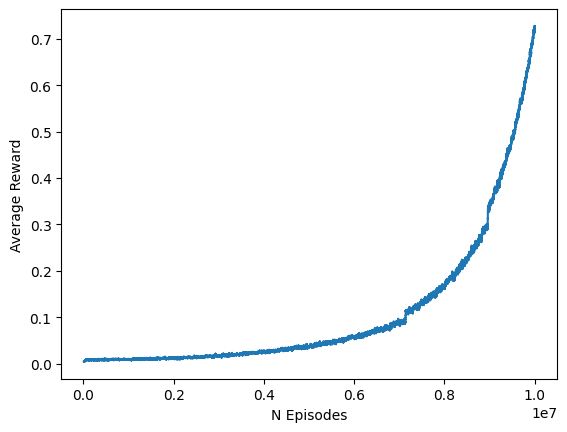

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

avgr = pd.Series(rrec).rolling(10000).mean()

fig = plt.figure()
ax = fig.gca()
avgr.plot(ax = ax)
ax.set_xlabel("N Episodes")
ax.set_ylabel("Average Reward")
plt.show()